In [397]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import mplleaflet

In [398]:
# let's join multiple files into one dataframe
path =r'C:\Users\Kostiantyn_Kudriavts\notebooks\dwnld\10-01' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df_ = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df_)
full_df = pd.concat(list_)

In [399]:
# extract columns subst
df = full_df[['PROPERTY TYPE', 'CITY', 'STATE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'YEAR BUILT', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']].copy()
df.head()

,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,YEAR BUILT,LOCATION,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE
0,Townhouse,Lynnwood,WA,98036,499000.0,3.0,2.5,2015.0,Lynnwood,1781.0,2145.0,180.0,47.819235,-122.268907
1,Single Family Residential,Lynnwood,WA,98036,535000.0,4.0,2.5,2000.0,Brier,1898.0,6098.0,NaN,47.812864,-122.264847
2,Single Family Residential,Lynnwood,WA,98036,549950.0,3.0,2.5,2012.0,Martha Lake,2056.0,4066.0,50.0,47.827543,-122.258007
3,Single Family Residential,Lynnwood,WA,98036,325000.0,3.0,2.0,1981.0,Alderwood Manor,1248.0,10454.0,NaN,47.816284,-122.276086
4,Single Family Residential,Lynnwood,WA,98036,500000.0,4.0,2.5,1965.0,Alderwood Manor,2706.0,8276.0,NaN,47.818136,-122.279972


In [426]:
# filter out properties outside of WA and keep only Townhouse and SFR
df = df[(df['STATE'] == 'WA') & (df['PROPERTY TYPE'] any ['Townhouse', 'Single Family Residential'])]

SyntaxError: invalid syntax (<ipython-input-426-6ad2f90a32cb>, line 2)

In [424]:
len(df)

array(['Townhouse', 'Single Family Residential', 'Condo/Co-op',
       'Mobile/Manufactured Home', 'Multi-Family (2-4 Unit)'],
      dtype=object)

In [402]:
df.describe()

,PRICE,BEDS,BATHS,YEAR BUILT,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE
count,2.916000e+03,2917.000000,2680.000000,2570.000000,2689.000000,2.557000e+03,1125.000000,2917.000000,2917.000000
mean,8.935831e+05,3.180665,2.459608,1986.946304,2396.173671,6.528017e+04,237.400889,47.722352,-122.167205
std,9.849445e+05,1.530866,1.013798,25.453234,1331.722692,2.259670e+05,270.417659,0.123896,0.169631
min,1.900000e+04,0.000000,0.750000,1900.000000,1.000000,1.000000e+00,2.000000,47.343174,-122.418293
25%,4.999500e+05,2.000000,1.750000,1970.250000,1454.000000,6.100000e+03,48.000000,47.627864,-122.289309
50%,6.999500e+05,3.000000,2.500000,1990.000000,2211.000000,9.603000e+03,125.000000,47.738500,-122.194385
75%,9.600000e+05,4.000000,3.000000,2007.000000,3080.000000,3.306900e+04,365.000000,47.810312,-122.118649
max,3.200000e+07,24.000000,24.000000,2020.000000,16430.000000,7.044959e+06,3187.000000,48.047245,-121.236754


In [403]:
# median price $893.583, 3 beds, 2 baths, built in 1986, sq 2396 = 222.5 sq m, lot 65280=1.5 acr

In [404]:
# 0.8 percentile
df.quantile(.8)

PRICE          1.099995e+06
BEDS           4.000000e+00
BATHS          3.000000e+00
YEAR BUILT     2.012200e+03
SQUARE FEET    3.229000e+03
LOT SIZE       4.704500e+04
HOA/MONTH      4.050000e+02
LATITUDE       4.782633e+01
LONGITUDE     -1.220828e+02
Name: 0.8, dtype: float64

In [405]:
# debug info
print(len(df))
print(len(df[df.BATHS < 2]))
print(len(df[df.BATHS >= 2]))
print(len(df[df['SQUARE FEET'] <= 1500]))
print(len(df[df.PRICE > 1250000]))

2917
696
1984
712
424


In [406]:
df = df[(df.BATHS >= 2) & (df.BEDS < 5) & (df.PRICE < 1250000) & (df['SQUARE FEET'] > 1500)]
len(df)


1096

In [407]:
# enrich data
# add price per sq ft
df['price_per_sqft'] = df['PRICE']/df['SQUARE FEET']

# add lot price
df['price_per_sqft_lot'] = df['PRICE']/df['LOT SIZE']

# change price scale from USD to thoushand USD
df["PRICE"] = df["PRICE"]/1000

# geolocation embeddeding 
df["LL"] = df['LATITUDE']*df['LONGITUDE']

df.head()


,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,YEAR BUILT,LOCATION,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE,price_per_sqft,price_per_sqft_lot,LL
0,Townhouse,Lynnwood,WA,98036,499.00,3.0,2.5,2015.0,Lynnwood,1781.0,2145.0,180.0,47.819235,-122.268907,280.179674,232.634033,-5846.805619
1,Single Family Residential,Lynnwood,WA,98036,535.00,4.0,2.5,2000.0,Brier,1898.0,6098.0,NaN,47.812864,-122.264847,281.875659,87.733683,-5845.832502
2,Single Family Residential,Lynnwood,WA,98036,549.95,3.0,2.5,2012.0,Martha Lake,2056.0,4066.0,50.0,47.827543,-122.258007,267.485409,135.255780,-5847.300085
4,Single Family Residential,Lynnwood,WA,98036,500.00,4.0,2.5,1965.0,Alderwood Manor,2706.0,8276.0,NaN,47.818136,-122.279972,184.774575,60.415660,-5847.200326
6,Townhouse,Lynnwood,WA,98036,479.00,3.0,2.5,2015.0,Alderwood,1815.0,NaN,180.0,47.819391,-122.269310,263.911846,NaN,-5846.843898


In [408]:
df.describe()

,PRICE,BEDS,BATHS,YEAR BUILT,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE,price_per_sqft,price_per_sqft_lot,LL
count,1096.000000,1096.000000,1096.000000,1017.000000,1096.000000,9.840000e+02,440.000000,1096.000000,1096.000000,1096.000000,984.000000,1096.000000
mean,743.900815,3.551095,2.620894,1992.423795,2457.812956,3.186273e+04,106.559091,47.747533,-122.151203,311.463678,8398.938787,-5832.425676
std,207.847701,0.549918,0.406546,22.575341,643.379115,1.149208e+05,138.641575,0.128398,0.157119,87.450502,76618.456894,19.589253
min,150.999000,1.000000,2.000000,1901.000000,1501.000000,1.000000e+00,2.000000,47.392328,-122.412380,77.738163,0.225155,-5860.326430
25%,600.000000,3.000000,2.500000,1978.000000,1960.000000,4.987250e+03,31.750000,47.696644,-122.232016,260.904696,43.220024,-5846.452826
50%,724.880000,4.000000,2.500000,1997.000000,2370.000000,8.208000e+03,53.000000,47.774731,-122.179142,303.231047,88.863000,-5838.391107
75%,876.225000,4.000000,2.750000,2010.000000,2858.000000,1.817400e+04,101.750000,47.833760,-122.104402,356.716418,154.231377,-5825.901275
max,1249.000000,4.000000,5.000000,2019.000000,7891.000000,2.664836e+06,831.000000,48.046956,-121.398285,766.155896,941990.000000,-5753.347330


In [409]:
!pip install sklearn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.4 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [410]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(df['PRICE'].values.reshape(-1, 1) )
kmeans.cluster_centers_


array([[1133.06021552],
       [ 480.39201271],
       [ 685.51134247],
       [ 883.18243464]])

In [411]:
import numpy as np

def predict(price):
    return kmeans.predict(np.atleast_1d(price).reshape(1, -1))[0]

df['CLUSTER'] = df.PRICE.apply( predict )


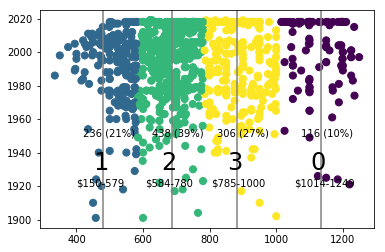

In [412]:
# collors show price cluster,Y-axis doesn't influence cluster selection 
plt.scatter(df['PRICE'], df['YEAR BUILT'], c=df['CLUSTER'], s=50, cmap='viridis')

centers = kmeans.cluster_centers_
total = len(df)
i = 0
for xc in centers:
    plt.axvline(x=xc, color='grey')
    cdf = df[df['CLUSTER'] == i]
    plt.text(xc-60, 1950, str( len(cdf) ) + ' (' + str(int(len(cdf)/total*100)) +'%)')
    plt.text(xc-80, 1920, '$' + str(int(cdf['PRICE'].min())) + '-' + str(int(cdf['PRICE'].max())) )
    plt.text(xc-30, 1930, str(i),  {'color': 'k', 'fontsize': 24})
    i = i + 1
    

In [413]:
import folium
print(folium.__file__)
print(folium.__version__)

C:\Users\Kostiantyn_Kudriavts\AppData\Local\Continuum\anaconda3\envs\spark\lib\site-packages\folium\__init__.py
0.6.0


In [414]:
import folium
# create empty map zoomed in on San Francisco
map_osm = folium.Map(location = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start = 10, tiles="CartoDB dark_matter")

def color_producer(cluster):
    if cluster == 0:
        return 'blue'
    elif cluster == 1:
        return 'yellow'
    elif cluster == 2:
        return 'magenta'
    else:
        return 'green'

MAX_RECORDS = len(df)
# add a marker for every record in the filtered data, use a clustered view
for each in df[0:MAX_RECORDS].iterrows():
    price = each[1]['PRICE']
    cluster = each[1]['CLUSTER']
    folium.Circle([each[1]['LATITUDE'], each[1]['LONGITUDE']], radius=1, color=color_producer(cluster), popup='$'+str(price)+' grans' ).add_to(map_osm)
  
display(map_osm)

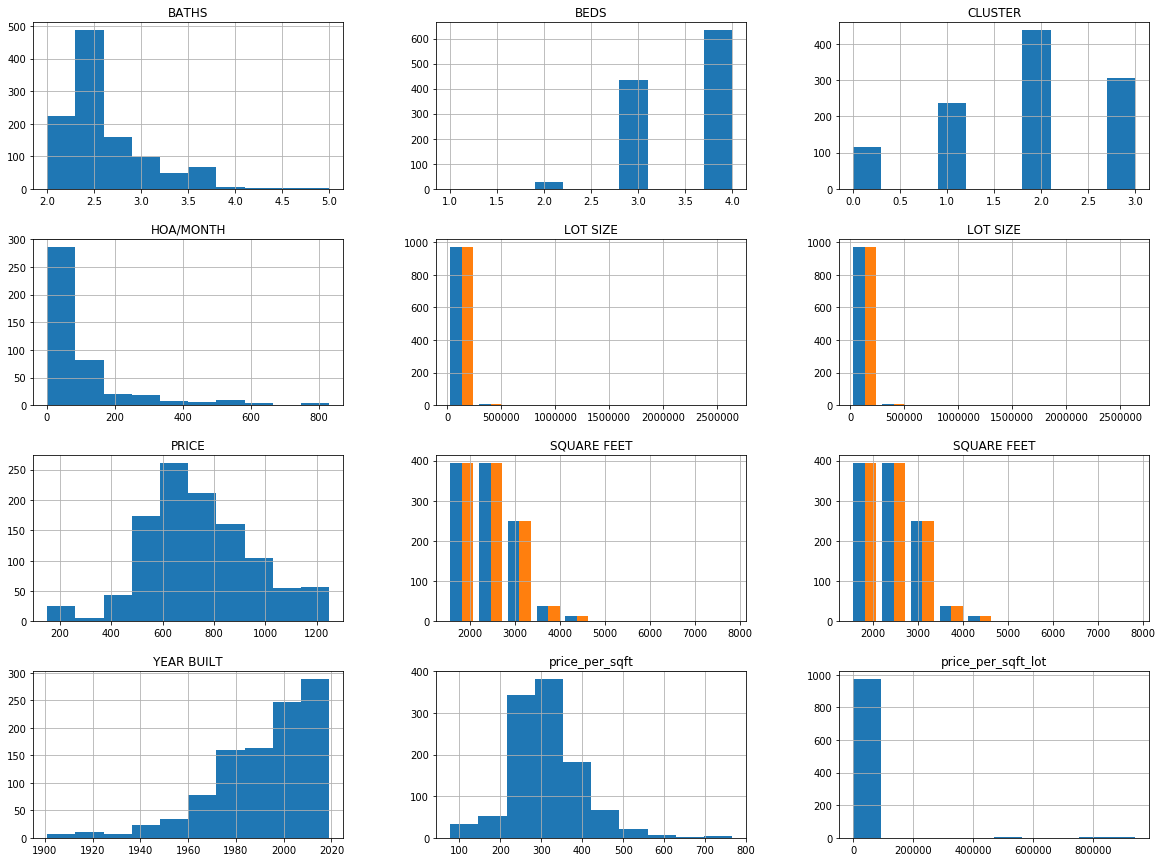

In [415]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(column=["PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", 'YEAR BUILT', 'SQUARE FEET', 'LOT SIZE', 
                'HOA/MONTH', 'price_per_sqft', 'price_per_sqft_lot', 'CLUSTER'],
          figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [416]:
# let’s look at how much each independent variable correlates with this dependent variable (which is price)
corr_matrix = df.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                 1.000000
price_per_sqft        0.580641
SQUARE FEET           0.481495
BATHS                 0.302879
BEDS                  0.215607
HOA/MONTH             0.100638
CLUSTER               0.067382
YEAR BUILT            0.053007
LOT SIZE              0.046956
LL                    0.016888
price_per_sqft_lot   -0.019488
LATITUDE             -0.102284
LONGITUDE            -0.170500
Name: PRICE, dtype: float64

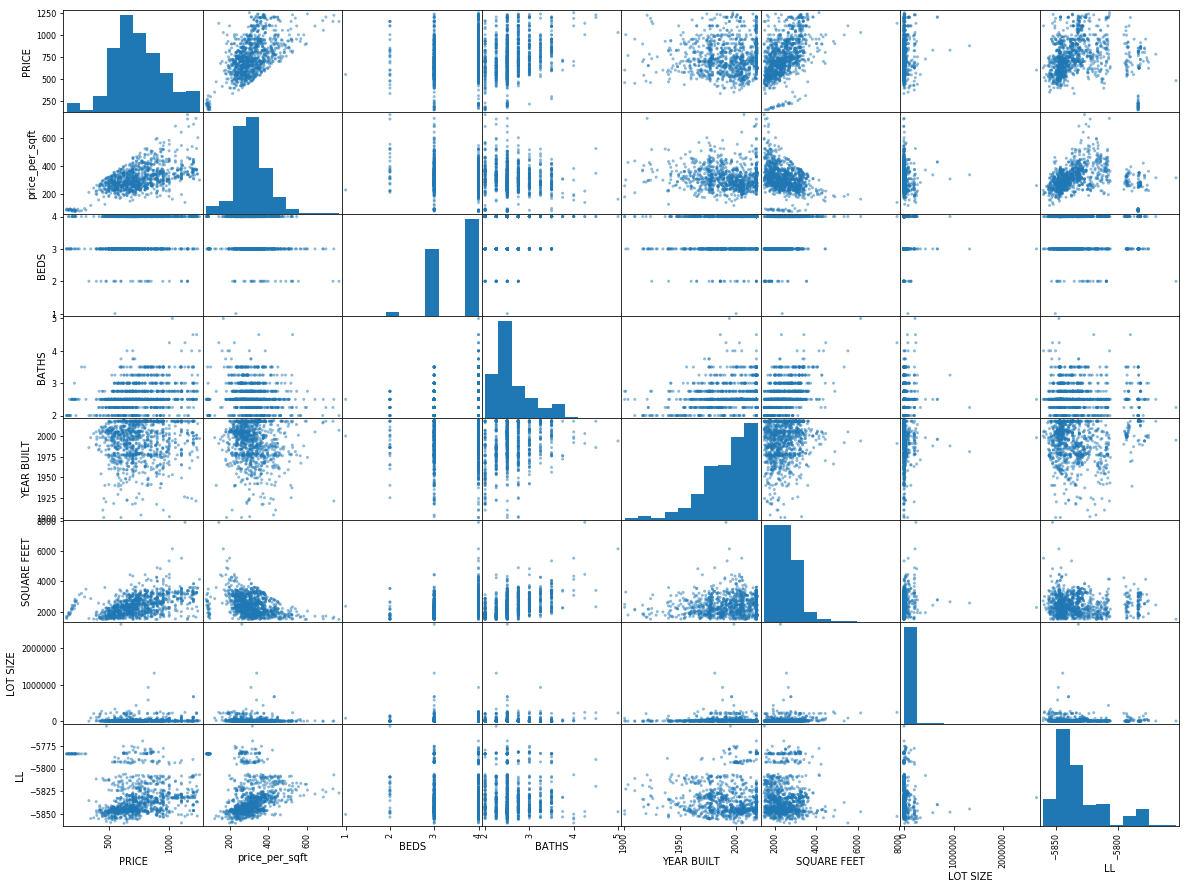

In [417]:
from pandas.plotting import scatter_matrix
attributes = ["PRICE", "price_per_sqft", "BEDS", "BATHS", 'YEAR BUILT', 'SQUARE FEET', 'LOT SIZE', 'LL']
scatter_matrix(df[attributes], figsize=(20, 15))
plt.savefig('matrix.png')

In [418]:
from sklearn.cluster import AgglomerativeClustering

geo_coord = df[['LATITUDE','LONGITUDE']]
clustering = AgglomerativeClustering(n_clusters=10, affinity='l2', linkage='average').fit(geo_coord)

label_name = clustering.labels_.astype(np.int)


In [419]:
from pandas import Series

df['GEO_CLUSTER'] = Series(clustering.labels_, index=df.index)
df.head()

,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,YEAR BUILT,LOCATION,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE,price_per_sqft,price_per_sqft_lot,LL,CLUSTER,GEO_CLUSTER
0,Townhouse,Lynnwood,WA,98036,499.00,3.0,2.5,2015.0,Lynnwood,1781.0,2145.0,180.0,47.819235,-122.268907,280.179674,232.634033,-5846.805619,1,0
1,Single Family Residential,Lynnwood,WA,98036,535.00,4.0,2.5,2000.0,Brier,1898.0,6098.0,NaN,47.812864,-122.264847,281.875659,87.733683,-5845.832502,1,0
2,Single Family Residential,Lynnwood,WA,98036,549.95,3.0,2.5,2012.0,Martha Lake,2056.0,4066.0,50.0,47.827543,-122.258007,267.485409,135.255780,-5847.300085,1,0
4,Single Family Residential,Lynnwood,WA,98036,500.00,4.0,2.5,1965.0,Alderwood Manor,2706.0,8276.0,NaN,47.818136,-122.279972,184.774575,60.415660,-5847.200326,1,0
6,Townhouse,Lynnwood,WA,98036,479.00,3.0,2.5,2015.0,Alderwood,1815.0,NaN,180.0,47.819391,-122.269310,263.911846,NaN,-5846.843898,1,0


In [420]:
aggregation = {
    'PRICE' : {
        'mean_price': 'mean',
        'median_price': 'median'
    },
    'price_per_sqft' : {
        'mean_price_sqft': 'mean',
        'median_price_sqft': 'median'
    }
}
df.groupby('GEO_CLUSTER').agg(aggregation)

C:\Users\Kostiantyn_Kudriavts\AppData\Local\Continuum\anaconda3\envs\spark\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



PRICE               price_per_sqft                  
             mean_price median_price mean_price_sqft median_price_sqft
GEO_CLUSTER                                                           
0            734.118131     700.0000      306.637542        297.356828
1            717.418087     697.0000      371.827781        346.298749
2            773.498554     739.9375      336.524658        329.353482
3            663.269703     649.9750      235.189635        231.145228
4            694.482654     679.9750      272.841359        263.042159
5            779.790000     779.7900      318.411597        318.411597
6            619.100901     680.0000      243.753265        271.820449
7            901.768611     898.9400      420.657673        424.013960
8            887.408784     859.5000      326.491142        329.437984
9            479.950000     479.9500      317.427249        317.427249

In [421]:
import math
# create empty map zoomed in on San Francisco
map_osm = folium.Map(location = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start = 8, tiles="CartoDB dark_matter")

colors = ['blue', 'aqua', 'green', 'Lime', 'yellow', 'DarkOrange', 'DarkSalmon', 'red', 'purple', 'Fuchsia', 'chocolate']
def get_color(cluster):
    if math.isnan(cluster):
        return "white"
    else:
        return colors[int(cluster)]

MAX_RECORDS = len(df)
# add a marker for every record in the filtered data, use a clustered view
for each in df[0:MAX_RECORDS].iterrows():
    price = each[1]['PRICE']
    cluster = each[1]['GEO_CLUSTER']
    folium.Circle([each[1]['LATITUDE'], each[1]['LONGITUDE']], radius=1, color=get_color(cluster), popup='$'+str(price)+' grans, cluster='+str(cluster) ).add_to(map_osm)
  
display(map_osm)

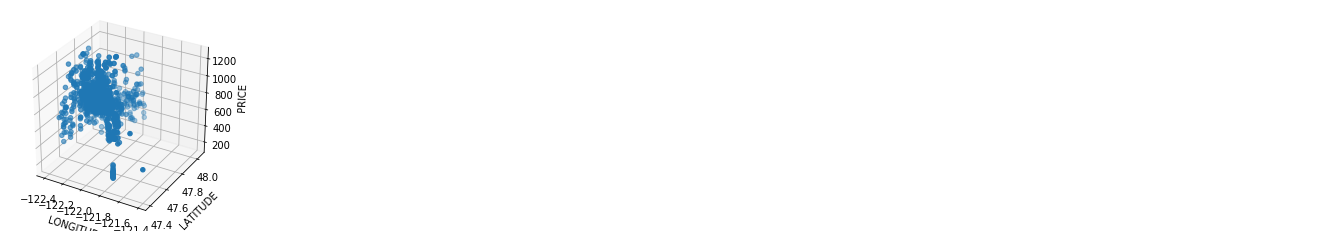

In [422]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure(figsize=(4, 4)).gca(projection='3d')
threedee.scatter(df['LONGITUDE'], df['LATITUDE'], df['PRICE'])
threedee.set_xlabel('LONGITUDE')
threedee.set_ylabel('LATITUDE')
threedee.set_zlabel('PRICE')
plt.show()

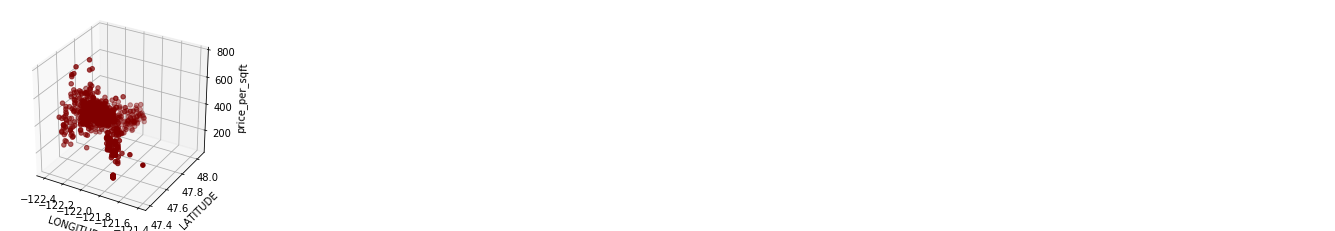

In [423]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure(figsize=(4, 4)).gca(projection='3d')
threedee.scatter(df['LONGITUDE'], df['LATITUDE'], df['price_per_sqft'], c='maroon')
threedee.set_xlabel('LONGITUDE')
threedee.set_ylabel('LATITUDE')
threedee.set_zlabel('price_per_sqft')
plt.show()